Assignment 8 Problem Number 2


a) Plot of SST for January 1 of this year for region where NINO3 is measured.

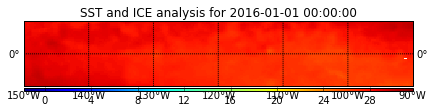

In [57]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2016,1,1) # date to plot.


# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)

m = Basemap(llcrnrlon=-150,llcrnrlat=-5,urcrnrlon=-90,urcrnrlat=5,projection='mill')


#rrrrrrrrrrrrrrrrrm = Basemap(projection='kav7',lon_0=0,resolution=None)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
#rrrrrrrrrrrrrrrrrm.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
#maybe erase........m.drawmeridians(np.arange(-180.,180.,60.), )
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

b) Plot NINO3 data as a function of time

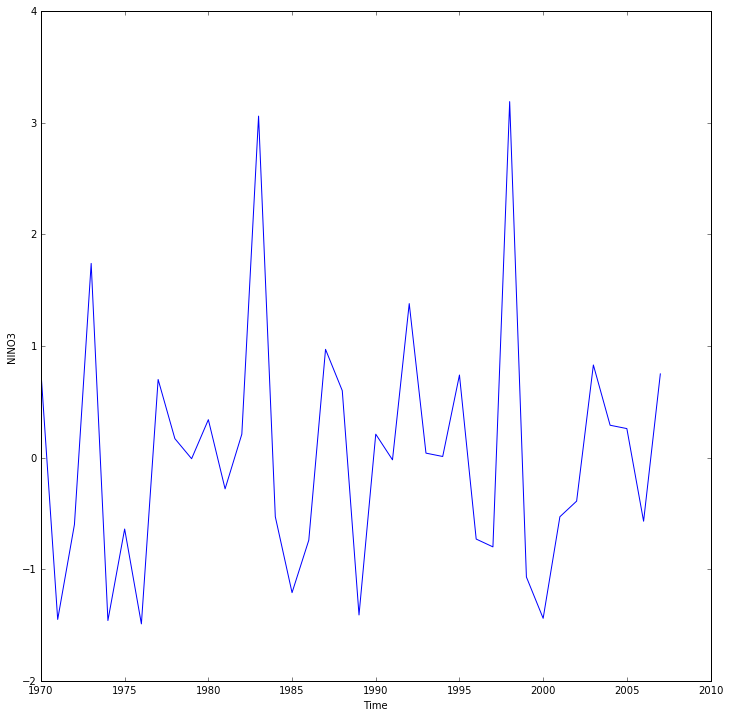

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline



Time=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(0))


NINO3=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(4))

plt.figure(figsize=(12, 12))

plt.plot(Time, NINO3)

plt.xlabel('Time')
plt.ylabel('NINO3')


c) When did the five largest El Nino events occur during this period?

    The five largest events occurred in 1973, 1983, 1987, 1992, and 1998.

d) Does Precipitation and Temperature correlat with five largest El Nino events?

    No, Precipitation has one large event of its largest events relating with El Nino (1998).
    
    Temperature's 5 largest events do not relate with the five largest events of El Nino.
    
    -Below is are two plots of Precipitation versus time and Temperature versus time.

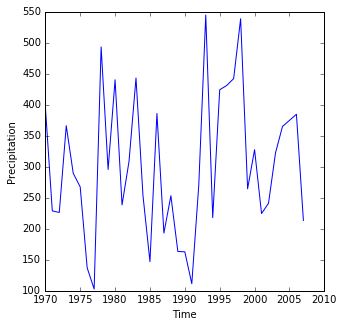

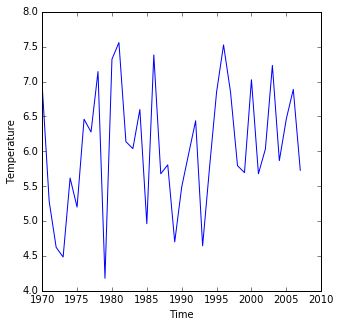

In [52]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

%matplotlib inline



Time=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(0))

Temperature=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(1))

Precipitation=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(2))

NINO3=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(4))


plt.figure(figsize=(5, 5))

plt.plot(Time, Precipitation)

plt.xlabel('Time')
plt.ylabel('Precipitation')



plt.figure(figsize=(5, 5))

plt.plot(Time, Temperature)

plt.xlabel('Time')
plt.ylabel('Temperature')



e) Use scipy to determine the correlation coefficients between Temperature/precipitation/snow and NINO3.

    The correlation coefficients are found with the code below.
    The correlation coefficients are:
        
        between:
            
            Temperature and NINO3        0.005
            Precipitation and NINO3      0.377
            Snow and NINO3               0.141
            
    The results suggest that:
        
            Temperature is uncorrelated to NINO3.
            Precipitation is somewhat correlated with NINO3.
            Snow has some correlation with NINO3, but not to high.
            
    From the results that I have, the Precipitation and snow are not equally correlated to NINO3.
            
    Yes the results are consistent with maps.
    

In [53]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

%matplotlib inline



Time=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(0))

Temperature=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(1))

Precipitation=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(2))

snow=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(3))

NINO3=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(4))

#plt.figure(figsize=(12, 12))

#plt.plot(Time, NINO3)

print pearsonr(Temperature, NINO3)

print pearsonr(Precipitation, NINO3)

print pearsonr(snow, NINO3)


#print pearsonr(snow[snow > -99], NINO3[snow > -99])


(0.0051124458580692608, 0.9756981034908927)
(0.37712170125989769, 0.019596097409072206)
(0.14197230760465335, 0.39518075319425461)


Below is another method I used to analyze correlations between Temperature/Precipitation/Snow and NINO3.

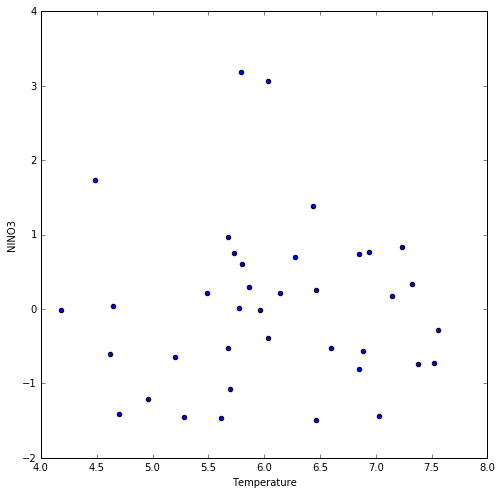

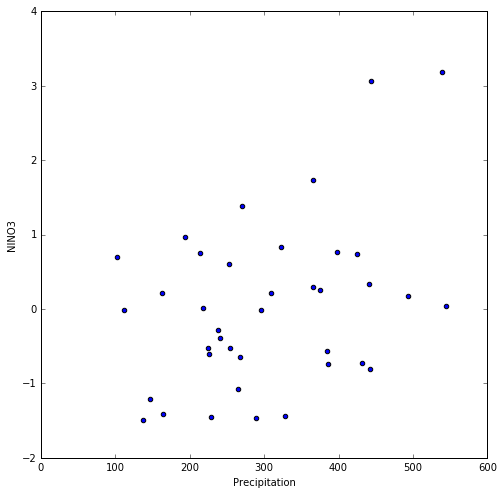

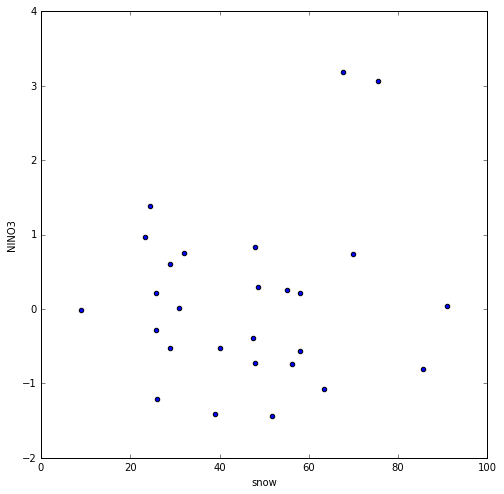

In [61]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

%matplotlib inline



Time=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(0))

Temperature=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(1))

Precipitation=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(2))

snow=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(3))

NINO3=np.genfromtxt('calidata_final.dat.txt', skip_header=1, usecols=(4))

#plt.figure(figsize=(12, 12))

#plt.plot(Time, NINO3)

plt.figure(figsize=(8, 8))

plt.scatter(Temperature, NINO3)

plt.xlabel('Temperature')
plt.ylabel('NINO3')

plt.figure(figsize=(8, 8))
plt.scatter(Precipitation, NINO3)

plt.xlabel('Precipitation')
plt.ylabel('NINO3')


plt.figure(figsize=(8, 8))
plt.scatter(snow[snow > -99], NINO3[snow > -99])

plt.xlabel('snow')
plt.ylabel('NINO3')




f) The first graphic shows the "weakly averaged" sea surface temperature, as a function of time. Color signifies hotter or colder temperatures.

    The second graphic shows the sea surface temperature relative to average temperature that is within that region ("anomalies").
    The second graphic is a record of past 12 weeks.
    We are currently in a warm event.